In [1]:
import matplotlib.pyplot as plt

def gradient(w):
    return 2 * w  # derivative of w^2

def constant_lr(eta, epochs, w_init):
    w = w_init
    history = []

    for t in range(epochs):
        grad = gradient(w)
        w = w - eta * grad
        history.append((t, w, eta))

    return history


In [3]:
def time_based_decay_lr(eta_0, decay, epochs, w_init):
    w = w_init
    history = []

    for t in range(epochs):
        eta = eta_0 / (1 + decay * t)
        grad = gradient(w)
        w = w - eta * grad
        history.append((t, w, eta))

    return history


In [5]:
import math

def step_decay_lr(eta_0, drop, step_size, epochs, w_init):
    w = w_init
    history = []

    for t in range(epochs):
        eta = eta_0 * (drop ** (math.floor(t / step_size)))
        grad = gradient(w)
        w = w - eta * grad
        history.append((t, w, eta))

    return history


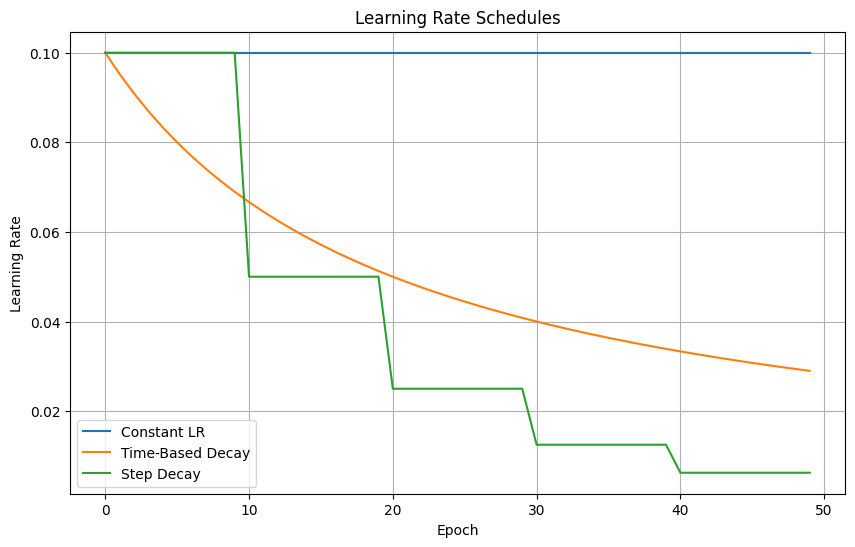

In [7]:
def plot_lr(history, label):
    steps = [h[0] for h in history]
    weights = [h[1] for h in history]
    lrs = [h[2] for h in history]

    plt.plot(steps, lrs, label=label)

epochs = 50
w_init = 5

# Collect results
const_hist = constant_lr(eta=0.1, epochs=epochs, w_init=w_init)
time_decay_hist = time_based_decay_lr(eta_0=0.1, decay=0.05, epochs=epochs, w_init=w_init)
step_decay_hist = step_decay_lr(eta_0=0.1, drop=0.5, step_size=10, epochs=epochs, w_init=w_init)

# Plot learning rates
plt.figure(figsize=(10, 6))
plot_lr(const_hist, "Constant LR")
plot_lr(time_decay_hist, "Time-Based Decay")
plot_lr(step_decay_hist, "Step Decay")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedules")
plt.legend()
plt.grid(True)
plt.show()
